In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

import nltk
nltk.download('punkt')

import string

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [3]:
pratice_Game=pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
pratice_Game.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
pratice_Game=pratice_Game[['v1','v2']]

In [6]:
pratice_Game.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
pratice_Game.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
pratice_Game.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
pratice_Game['target'].replace({
    'ham':0,
    'spam':1
},inplace=True)

In [10]:
pratice_Game.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

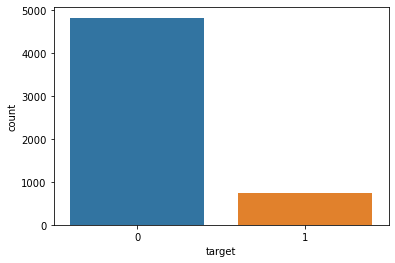

In [11]:
sns.countplot('target',data=pratice_Game)

In [12]:
pratice_Game['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

In [13]:
span_mail=pratice_Game[pratice_Game['target']==1]

In [14]:
undersample=pratice_Game[pratice_Game['target']==0]

In [15]:
undersample=undersample.sample(n=747)

In [16]:
undersample

,target,text
4469,0,"Lemme know when I can swing by and pick up, I'..."
2041,0,ÌÏ dun wan to watch infernal affair?
480,0,"Almost there, see u in a sec"
4937,0,No it was cancelled yeah baby! Well that sound...
2912,0,Kindly send some one to our flat before &lt;D...
...,...,...
434,0,You available now? I'm like right around hills...
4976,0,A boy was late 2 home. His father: \POWER OF F...
3651,0,"Probably not, still going over some stuff here"
5349,0,I'm home...


In [17]:
undersample=pd.concat([undersample,span_mail],axis=0)

In [18]:
undersample.shape

(1494, 2)

In [19]:
undersample.duplicated().sum()

112

In [20]:
undersample=undersample.drop_duplicates(keep='first')

In [21]:
undersample['num_characters']=undersample['text'].apply(len)

In [22]:
undersample['num_words']=undersample['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
undersample['num_sentence']=undersample['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
undersample.head()

,target,text,num_characters,num_words,num_sentence
4469,0,"Lemme know when I can swing by and pick up, I'...",97,23,1
2041,0,ÌÏ dun wan to watch infernal affair?,36,8,1
480,0,"Almost there, see u in a sec",28,8,1
4937,0,No it was cancelled yeah baby! Well that sound...,129,27,2
2912,0,Kindly send some one to our flat before &lt;D...,64,17,1


In [25]:
undersample[undersample['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,729.000000,729.000000,729.000000
mean,68.898491,16.711934,1.803841
std,55.130222,13.229042,1.316082
min,3.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,50.000000,13.000000,1.000000
75%,88.000000,22.000000,2.000000
max,588.000000,153.000000,16.000000


In [26]:
undersample[undersample['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


As we can see that average characters in ham sms are 73 compared to span which has 137 and its same for num_words and num_sentence

span mail contains eveything in larger amount as they are descrptive

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

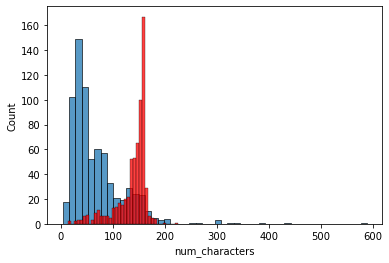

In [27]:
sns.histplot(undersample[undersample['target']==0]['num_characters'])
sns.histplot(undersample[undersample['target']==1]['num_characters'],color='red')

<AxesSubplot:>

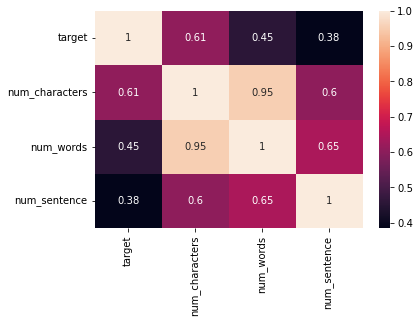

In [28]:
sns.heatmap(undersample.corr(),annot=True)

In [29]:
undersample=undersample[['target','text','num_characters']]

In [30]:
undersample.head()

,target,text,num_characters
4469,0,"Lemme know when I can swing by and pick up, I'...",97
2041,0,ÌÏ dun wan to watch infernal affair?,36
480,0,"Almost there, see u in a sec",28
4937,0,No it was cancelled yeah baby! Well that sound...,129
2912,0,Kindly send some one to our flat before &lt;D...,64


In [31]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[ : ]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[ : ]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [32]:
# Example:

transform("Hi how are %20% you!!! , i am fine dancing and hopping")

'hi 20 fine danc hop'

The above trandform function is made to remove stopwords ,punctuation marks and converting words in to their root form

# 

In [33]:
# Applying the above transform on column 'text'

undersample['text']=undersample['text'].apply(lambda x : transform(x))

In [34]:
undersample.head()

,target,text,num_characters
4469,0,lem know swing pick free basic time 1 semest,97
2041,0,ìï dun wan watch infern affair,36
480,0,almost see u sec,28
4937,0,cancel yeah babi well sound import understand ...,129
2912,0,kindli send one flat lt decim gt today,64


In [35]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=9,background_color='white')

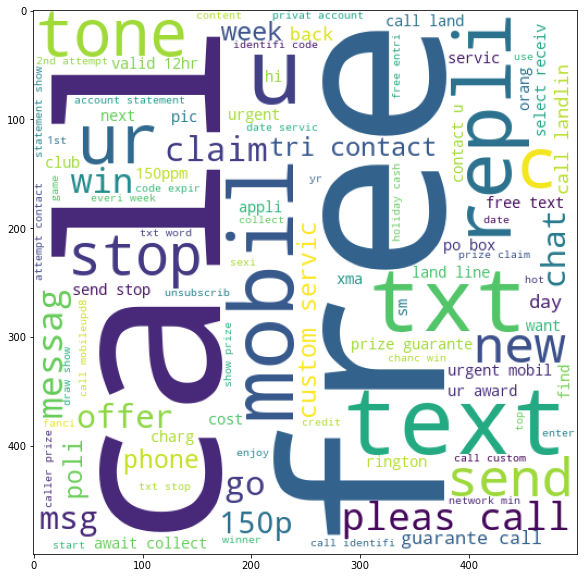

In [36]:
# Wordcloud for spam msgs

spamMsgs=wc.generate(undersample[undersample['target']==1]['text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))

plt.imshow(spamMsgs)

As we can see in the above chart the most highlighted and big in size numbers are frequently used in for spam msgs

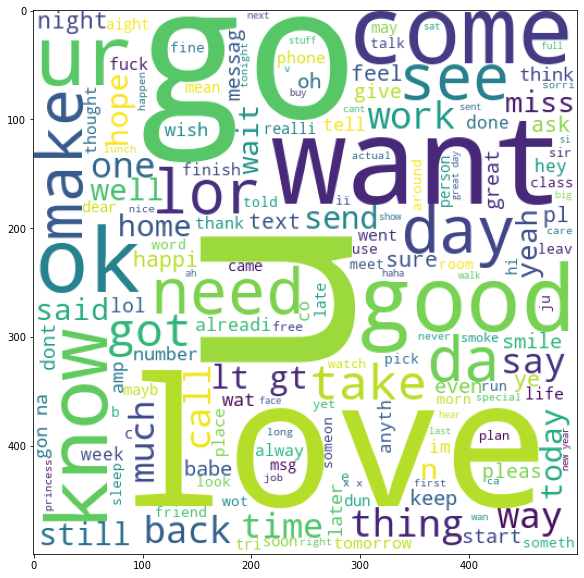

In [37]:
# Wordcloud for ham msgs

hamMsgs=wc.generate(undersample[undersample['target']==0]['text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))

plt.imshow(hamMsgs)

In [38]:
undersample[undersample['target']==0]['text'].tolist()[0].split()

['lem', 'know', 'swing', 'pick', 'free', 'basic', 'time', '1', 'semest']

In [39]:
ham_msg=[]

for msg in undersample[undersample['target']==0]['text'].tolist():
    for words in msg.split():
        ham_msg.append(words)
        

In [40]:
from collections import Counter

pd.DataFrame(Counter(ham_msg).most_common(30))


,0,1
0,u,131
1,get,55
2,go,43
3,love,40
4,2,40
5,want,38
6,come,38
7,day,37
8,good,37
9,know,36


In [41]:
spam_msg=[]

for msg in undersample[undersample['target']==1]['text'].tolist():
    for words in msg.split():
        spam_msg.append(words)

In [42]:
pd.DataFrame(Counter(spam_msg).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\abhis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


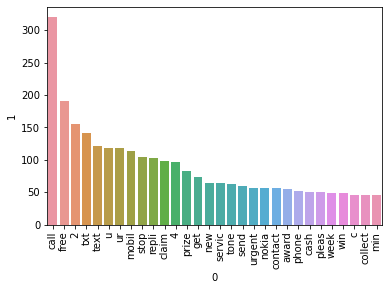

In [43]:
sns.barplot(pd.DataFrame(Counter(spam_msg).most_common(30))[0],pd.DataFrame(Counter(spam_msg).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
undersample.head()

,target,text,num_characters
4469,0,lem know swing pick free basic time 1 semest,97
2041,0,ìï dun wan watch infern affair,36
480,0,almost see u sec,28
4937,0,cancel yeah babi well sound import understand ...,129
2912,0,kindli send one flat lt decim gt today,64


In [45]:
# we need to convert catogerical values in to numerical as to train and test the dataset

train = ['The sky is blue.','The sun is bright.']

print(vectorizer.fit_transform(train))

  (0, 0)	0.5761523551647353
  (0, 2)	0.40993714596036396
  (0, 3)	0.5761523551647353
  (0, 5)	0.40993714596036396
  (1, 1)	0.5761523551647353
  (1, 4)	0.5761523551647353
  (1, 2)	0.40993714596036396
  (1, 5)	0.40993714596036396


In [58]:
X=vectorizer.fit_transform(undersample['text']).toarray()
y=undersample['target']

In [59]:
X.shape

(1382, 3534)

In [60]:
y.shape

(1382,)

# Train_Test_Split with Naive_Bayes algorithm

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [64]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [65]:
y_train_predict=model.predict(X_train)
train_accuracy=accuracy_score(y_train_predict,y_train)

In [66]:
train_accuracy

1.0

In [68]:
y_test_predict=model.predict(X_test)
test_accuracy=accuracy_score(y_test_predict,y_test)

In [69]:
test_accuracy

0.9180722891566265